In [1]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt 

In [2]:
from plotutils import gaussian2dplot, connect_subplots

In [3]:
np.random.seed(7)

In [4]:
m = np.zeros(2)
C = np.array([[1.0, 0.8],
              [0.8, 1.0]])
N = 1000
points = np.array([[-2, -2],
                   [0, np.sqrt(8)]])

In [5]:
def spectral_decomposition(A):
    w, v = np.linalg.eig(A)
    return np.diag(w), v

In [6]:
sqrtP = sqrtm(np.linalg.inv(C))
D, R = spectral_decomposition(C)
D = sqrtm(np.linalg.inv(D))

In [7]:
cloud = np.random.multivariate_normal(m, C, N)
rotated_cloud = cloud @ R
whitenned_cloud = rotated_cloud @ D

In [8]:
lambdas, vs = np.linalg.eig(np.cov(cloud.T))
nvs = np.sqrt(lambdas) * vs
rotated_nvs = nvs.T @ R
whitenned_nvs = rotated_nvs @ D

In [9]:
rotated_points = points @ R
whitenned_points = rotated_points @ D

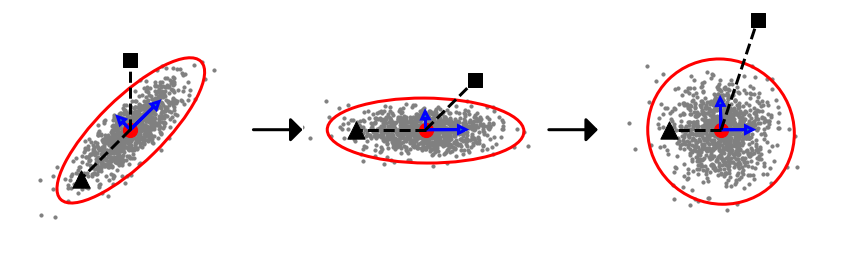

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))
for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.axis('off')
gaussian2dplot(axs[0], m, cloud, points, nvs)
gaussian2dplot(axs[1], m, rotated_cloud, rotated_points, rotated_nvs)
gaussian2dplot(axs[2], m, whitenned_cloud, whitenned_points, whitenned_nvs)
connect_subplots(axs[0], axs[1])
connect_subplots(axs[1], axs[2])
